In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 使用numpy生成200个随机点 :np.newaxis生成数据在前,存储在":"中，新加维度存在后面
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]

# 生成干扰项,x_data.shape 表示与x_data形状一样
noise = np.random.normal(0,0.02,x_data.shape)
y_data=np.square(x_data)+noise

In [3]:
# 行不确定，列确定，仅有一列
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])

In [4]:
# 神经网络中间层
#构建神经网络的中间层 1行10列  1个输入
weight_L1 = tf.Variable(tf.random_normal([1,10]))
# 10个成员有10个偏置值,默认0
base_L1=tf.Variable(tf.zeros([1,10]))
wx_plus_b_L1=tf.matmul(x,weight_L1)+base_L1
#双曲正切函数作为输出函数
L1= tf.nn.tanh(wx_plus_b_L1)

In [5]:
#神经网络输出层 
# 10行1列
weight_L2=tf.Variable(tf.random_normal([10,1]))
base_L2=tf.Variable(tf.zeros([1,1]))
# 输出层的输入相当于中间层的输出
L2= tf.matmul(L1,weight_L2)+base_L2
prediction = tf.nn.tanh(L2)


In [6]:
# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
# 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

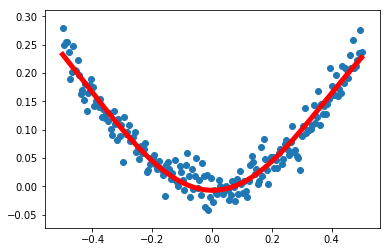

In [7]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for _ in range(2000):
        s.run(train_step,feed_dict={x:x_data,y:y_data})
        
    # 获得预测值,只需要传入x_data
    prediction_value=s.run(prediction,feed_dict={x:x_data})
    # 画图
    plt.figure
    # 散点图方式传入
    plt.scatter(x_data,y_data)
    # r红色 -实线 lw线宽度
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()